In [1]:
# Importing the libraries
import numpy as np                                # Numerical operations
import pandas as pd                               # Data manipulation
import matplotlib.pyplot as plt                   # Basic plotting
import seaborn as sns                             # Statistical visualizations

from sklearn.preprocessing import LabelEncoder       # Encode categorical labels
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (                        # Model evaluation metrics
    accuracy_score,
    classification_report,
    confusion_matrix
)
from sklearn.model_selection import train_test_split  # Data splitting

from imblearn.over_sampling import SMOTE              # Synthetic minority oversampling
from imblearn.pipeline import Pipeline                # Build ML pipelines

#Path setup
import os                             # Operating system utilities
from pathlib import Path              # Object-oriented filesystem paths
notebook_path = Path().absolute()     # Current notebook location
project_root = notebook_path.parent   # Project root directory

In [2]:
#df = pd.read_csv('data_lakehouse/gold/starG.csv')
df = pd.read_csv(project_root/'data'/'gold'/'starG.csv')

# Imputation
df['corrected_effective_temperature_1'] = df['effective_temperature_1'].combine_first(df['effective_temperature_2'])
df['corrected_log_surface_gravity_1'] = df['log_surface_gravity_1'].combine_first(df['log_surface_gravity_2'])
df['corrected_metallicity_fe_h_2'] = df['metallicity_fe_h_2'].combine_first(df['metallicity_fe_h_1'])

df

,identifier,class,subclass,luminosity_class,full_class,recno,spt,effective_temperature_1,log_surface_gravity_1,metallicity_fe_h_1,...,metallicity_fe_h_2,radius,mass,luminosity,distance,lamost,date,corrected_effective_temperature_1,corrected_log_surface_gravity_1,corrected_metallicity_fe_h_2
0,19850119_J025942.96+011122.1,F,F0,NaN,F0,2251,kA5hA8mA9,7569.0,3.860,0.220,...,0.2220,1.820,1.760,9.80948,1171.0200,J025942.96+011122.1,1985-01-19 10:44:00,7569.0,3.8600,0.2220
1,19850119_J025947.35+020834.1,A,A6,IV,A6IV,2254,kA4hA9mA9,7124.0,4.187,-0.367,...,-0.3780,2.440,1.590,13.91443,3164.3701,J025947.35+020834.1,1985-01-19 11:57:00,7124.0,4.1870,-0.3780
2,19850119_J030043.83+021812.4,A,A2,V,A2V,2273,kA3hA5mA7,NaN,NaN,NaN,...,NaN,1.254,1.210,2.13966,440.9360,J030043.83+021812.4,1985-01-19 10:44:00,6234.0,4.3243,NaN
3,19850119_J030336.54+025459.5,A,A7,V,A7V,2332,kA3hA6mA7,7254.0,4.186,-0.467,...,-0.4705,1.480,1.620,5.39942,905.6660,J030336.54+025459.5,1985-01-19 10:44:00,7254.0,4.1860,-0.4705
4,19861124_J025406.46+025537.7,A,A3,V,A3V,2151,kA2hA4mA7,NaN,NaN,NaN,...,NaN,1.277,1.280,2.43731,2151.9600,J025406.46+025537.7,1986-11-24 15:16:00,6383.0,4.3332,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21630,19830307_J145332.99-020651.5,A,A3,IV,A3IV,18473,kA2hA4mA7,NaN,NaN,NaN,...,-0.6900,4.078,1.550,36.77406,4210.2002,J145332.99-020651.5,1983-03-07 19:31:00,7039.0,3.4076,-0.6900
21631,19860518_J150420.63-012544.0,A,A7,V,A7V,18498,kA3hA5mA7,7475.0,4.119,-0.343,...,-0.3390,1.663,1.720,7.78983,717.9860,J150420.63-012544.0,1986-05-18 16:41:00,7475.0,4.1190,-0.3390
21632,19821001_J213339.08-082740.4,A,A7,IV,A7IV,20746,kA7hF1mF1,NaN,NaN,NaN,...,NaN,1.705,1.590,6.76456,400.5130,J213339.08-082740.4,1982-10-01 13:53:00,7129.0,4.1760,NaN
21633,19821008_J210850.48-082114.5,A,A7,IV,A7IV,20552,kA7hF0mF1,7327.0,4.017,-0.043,...,-0.0530,1.801,1.661,8.43666,311.7170,J210850.48-082114.5,1982-10-08 13:41:00,7327.0,4.0170,-0.0530


In [3]:
years = [ date[0:4] for date in df['date'] ]
print(min(years),'-', max(years))

1981 - 1991


In [4]:
df_T = df.drop(['luminosity_class', 'log_surface_gravity_1', 'metallicity_fe_h_2']
, axis=1).dropna()
# Add corrected variables to df_T using fallbacks from twin columns
#df_lum['corrected_effective_temperature_1'] = df['effective_temperature_1'].combine_first(df_T['effective_temperature_2'])
#df_lum['corrected_log_surface_gravity_1'] = df['log_surface_gravity_1'].combine_first(df_T['log_surface_gravity_2'])
#df_lum['corrected_metallicity_fe_h_2'] = df['metallicity_fe_h_2'].combine_first(df_T['metallicity_fe_h_1'])
df_T

,identifier,class,subclass,full_class,recno,spt,effective_temperature_1,metallicity_fe_h_1,visual_magnitude,effective_temperature_2,log_surface_gravity_2,radius,mass,luminosity,distance,lamost,date,corrected_effective_temperature_1,corrected_log_surface_gravity_1,corrected_metallicity_fe_h_2
0,19850119_J025942.96+011122.1,F,F0,F0,2251,kA5hA8mA9,7569.0,0.220,12.872,7571.0,4.1632,1.820,1.760,9.80948,1171.0200,J025942.96+011122.1,1985-01-19 10:44:00,7569.0,3.860,0.2220
1,19850119_J025947.35+020834.1,A,A6,A6IV,2254,kA4hA9mA9,7124.0,-0.367,14.712,7137.0,3.8647,2.440,1.590,13.91443,3164.3701,J025947.35+020834.1,1985-01-19 11:57:00,7124.0,4.187,-0.3780
3,19850119_J030336.54+025459.5,A,A7,A7V,2332,kA3hA6mA7,7254.0,-0.467,12.935,7232.0,4.3071,1.480,1.620,5.39942,905.6660,J030336.54+025459.5,1985-01-19 10:44:00,7254.0,4.186,-0.4705
8,19851023_J025238.06+043338.9,A,A6,A6IV,2120,kA2hA4mA6,8371.0,-0.349,13.887,8335.0,4.4847,1.360,2.060,8.04498,1664.7900,J025238.06+043338.9,1985-10-23 16:20:00,8371.0,4.472,-0.3640
10,19850108_J024848.07+052529.9,F,F0,F0,2061,kA2hA5mA9,7400.0,0.204,12.573,7403.0,4.3046,1.516,1.690,6.21710,770.9760,J024848.07+052529.9,1985-01-08 12:32:00,7400.0,3.981,0.2040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21626,19850131_J085556.02-005611.0,A,A6,A6IV,17610,kA2hA5mA8,8340.0,0.073,12.415,8280.0,4.3271,1.623,2.040,11.15012,1018.4400,J085556.02-005611.0,1985-01-31 16:46:00,8340.0,4.475,0.0690
21629,19860518_J150355.99-032059.0,A,A7,A7V,18496,kA5hA7mA8,7554.0,-0.290,10.650,7559.0,3.9900,2.216,1.750,14.44529,530.9910,J150355.99-032059.0,1986-05-18 16:41:00,7554.0,4.036,-0.2760
21631,19860518_J150420.63-012544.0,A,A7,A7V,18498,kA3hA5mA7,7475.0,-0.343,11.774,7477.0,4.2316,1.663,1.720,7.78983,717.9860,J150420.63-012544.0,1986-05-18 16:41:00,7475.0,4.119,-0.3390
21633,19821008_J210850.48-082114.5,A,A7,A7IV,20552,kA7hF0mF1,7327.0,-0.043,9.879,7330.0,4.1473,1.801,1.661,8.43666,311.7170,J210850.48-082114.5,1982-10-08 13:41:00,7327.0,4.017,-0.0530


In [5]:
df_lum = df.drop(['class','subclass','full_class', 'log_surface_gravity_1', 'metallicity_fe_h_2']
, axis=1).dropna()
# Add corrected variables to df_T using fallbacks from twin columns
#df_lum['corrected_effective_temperature_1'] = df['effective_temperature_1'].combine_first(df_T['effective_temperature_2'])
#df_lum['corrected_log_surface_gravity_1'] = df['log_surface_gravity_1'].combine_first(df_T['log_surface_gravity_2'])
#df_lum['corrected_metallicity_fe_h_2'] = df['metallicity_fe_h_2'].combine_first(df_T['metallicity_fe_h_1'])
df_lum

,identifier,luminosity_class,recno,spt,effective_temperature_1,metallicity_fe_h_1,visual_magnitude,effective_temperature_2,log_surface_gravity_2,radius,mass,luminosity,distance,lamost,date,corrected_effective_temperature_1,corrected_log_surface_gravity_1,corrected_metallicity_fe_h_2
1,19850119_J025947.35+020834.1,IV,2254,kA4hA9mA9,7124.0,-0.367,14.712,7137.0,3.8647,2.440,1.590,13.91443,3164.3701,J025947.35+020834.1,1985-01-19 11:57:00,7124.0,4.187,-0.3780
3,19850119_J030336.54+025459.5,V,2332,kA3hA6mA7,7254.0,-0.467,12.935,7232.0,4.3071,1.480,1.620,5.39942,905.6660,J030336.54+025459.5,1985-01-19 10:44:00,7254.0,4.186,-0.4705
8,19851023_J025238.06+043338.9,IV,2120,kA2hA4mA6,8371.0,-0.349,13.887,8335.0,4.4847,1.360,2.060,8.04498,1664.7900,J025238.06+043338.9,1985-10-23 16:20:00,8371.0,4.472,-0.3640
16,19811123_J033448.81+092317.9,V,2920,kA3hA5mA8,7394.0,-0.428,12.956,7437.0,4.1838,1.747,1.700,8.41672,735.7230,J033448.81+092317.9,1981-11-23 16:19:00,7394.0,4.263,-0.4436
25,19851012_J025630.52+095718.5,IV,2197,kA4hA9mA9,7115.0,-0.329,15.419,7115.0,4.2183,1.619,1.580,6.04880,1948.6500,J025630.52+095718.5,1985-10-12 17:16:00,7115.0,4.265,-0.3300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21620,19850131_J085129.62-020629.9,V,17571,kA5hA7mA9,7690.0,0.044,13.073,7695.0,4.2806,1.613,1.810,8.21864,1283.1500,J085129.62-020629.9,1985-01-31 16:46:00,7690.0,4.087,0.0490
21626,19850131_J085556.02-005611.0,IV,17610,kA2hA5mA8,8340.0,0.073,12.415,8280.0,4.3271,1.623,2.040,11.15012,1018.4400,J085556.02-005611.0,1985-01-31 16:46:00,8340.0,4.475,0.0690
21629,19860518_J150355.99-032059.0,V,18496,kA5hA7mA8,7554.0,-0.290,10.650,7559.0,3.9900,2.216,1.750,14.44529,530.9910,J150355.99-032059.0,1986-05-18 16:41:00,7554.0,4.036,-0.2760
21631,19860518_J150420.63-012544.0,V,18498,kA3hA5mA7,7475.0,-0.343,11.774,7477.0,4.2316,1.663,1.720,7.78983,717.9860,J150420.63-012544.0,1986-05-18 16:41:00,7475.0,4.119,-0.3390


# 1. Class Classification

In [6]:
# Configuration
TARGET_COLUMN    = ['class']                                   # Target label
# FEATURE_COLUMNS  = ['effective_temperature_2',                 # Input features
#                     'radius', 'mass', 'distance']

FEATURE_COLUMNS = [
    'mass', 'radius', 'distance', 'luminosity',
    'visual_magnitude',
    'corrected_effective_temperature_1',
    'corrected_log_surface_gravity_1',
    'log_surface_gravity_2',
    #'metallicity_fe_h_1',
    'corrected_metallicity_fe_h_2'
]

# Data preparation
label_encoder = LabelEncoder()                                 # Initialize label encoder
y = label_encoder.fit_transform(df_T[TARGET_COLUMN])           # Encode target variable
X = df_T[FEATURE_COLUMNS]                                      # Select features

# Stratified train-test split
X_train, X_val, y_train, y_val = train_test_split(             # Split dataset
    X, y, test_size=0.1, stratify=y, random_state=42
)

# Class balancing with SMOTE
smote = SMOTE(sampling_strategy='not majority', random_state=42)  # Initialize SMOTE
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)   # Apply to training data

# Model training
model = RandomForestClassifier(                                # Random Forest classifier
    n_estimators=20,                                           # Number of trees
    max_depth=2,                                               # Maximum tree depth
    bootstrap=True,                                            # Use bootstrapping
    class_weight='balanced_subsample',                         # Class weighting
    random_state=42                                            # Seed
)
model.fit(X_train_res, y_train_res)                            # Train on resampled data

# Evaluation
y_pred = model.predict(X_val)                                  # Predict on validation set
print("\n=== Enhanced Evaluation ===")                         
print(f"Validation Accuracy: {accuracy_score(y_val, y_pred):.4f}")  # Print accuracy
print("\nClassification Report:")                              
print(classification_report(y_val, y_pred,                      # Report metrics
                            target_names=label_encoder.classes_,
                            zero_division=0))

# Model wrapper for reuse
def class_classifier():
    return model


=== Enhanced Evaluation ===
Validation Accuracy: 0.7986

Classification Report:
              precision    recall  f1-score   support

           A       0.84      0.60      0.70       448
           F       0.78      0.93      0.85       699

    accuracy                           0.80      1147
   macro avg       0.81      0.76      0.77      1147
weighted avg       0.80      0.80      0.79      1147



/home/dmitry/Projects/star_classification/venv/lib/python3.13/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
# Initialize models
models = {
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=20, max_depth=2, random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'GaussianNB': GaussianNB()
}

best_accuracy = 0
best_model = None
best_model_name = ""
best_cm = None

# Train and evaluate each model
for model_name, model in models.items():
    # Apply SMOTE to training data
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_val)
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    train_accuracy = accuracy_score(y_train_res, model.predict(X_train_res))
    
    # Print results
    print(f'\n[******* {model_name} ******]')
    print(f'\n   Validation Accuracy: {accuracy:.4f}')
    print(f'   Training Accuracy: {train_accuracy:.4f}')
    print('\n', classification_report(y_val, y_pred, target_names=label_encoder.classes_, zero_division=0))
    
    # Store best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = model_name
        best_cm = confusion_matrix(y_val, y_pred)

# Print model scores
print("\nModel Performance Summary:")
for model_name, model in models.items():
    print(f"{model_name}: {model.score(X_val, y_val)*100:.2f}%")

# Set best model to original variable names
model = best_model
print(f"\nBest Model: {best_model_name} with accuracy {best_accuracy:.4f}")

# Confusion matrix of best model (matches original variable name)
y_pred = model.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

# For next cell compatibility:
# model, y_pred, and cm variables are ready for plotting

/home/dmitry/Projects/star_classification/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



[******* LogisticRegression ******]

   Validation Accuracy: 0.8248
   Training Accuracy: 0.8342

               precision    recall  f1-score   support

           A       0.78      0.77      0.77       448
           F       0.85      0.86      0.86       699

    accuracy                           0.82      1147
   macro avg       0.82      0.81      0.82      1147
weighted avg       0.82      0.82      0.82      1147


[******* DecisionTreeClassifier ******]

   Validation Accuracy: 0.7768
   Training Accuracy: 1.0000

               precision    recall  f1-score   support

           A       0.70      0.76      0.73       448
           F       0.84      0.79      0.81       699

    accuracy                           0.78      1147
   macro avg       0.77      0.77      0.77      1147
weighted avg       0.78      0.78      0.78      1147


[******* RandomForestClassifier ******]

   Validation Accuracy: 0.7995
   Training Accuracy: 0.7763

               precision    recall  f1-

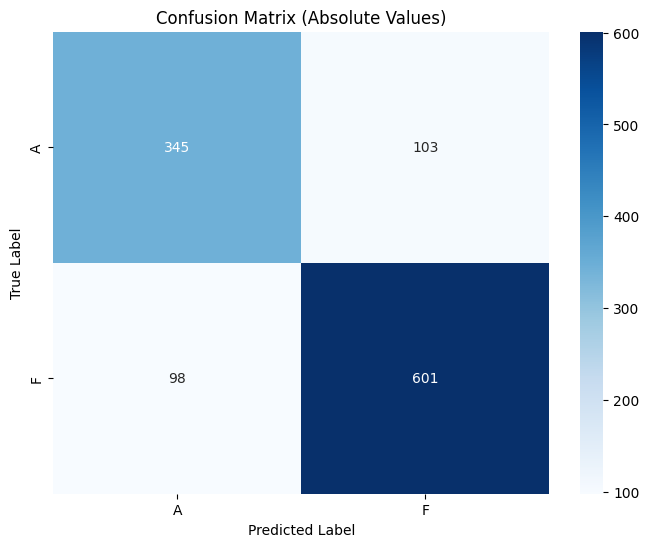

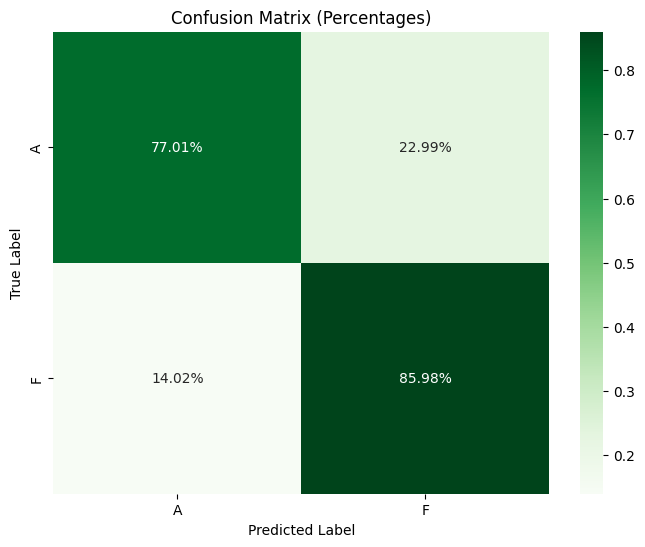

In [8]:
# Confusion matrix visualizations
cm = confusion_matrix(y_val, class_classifier().predict(X_val))     # Compute confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # Normalize by row

plt.figure(figsize=(8, 6))                                          # Set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',                  # Absolute values heatmap
            xticklabels=label_encoder.classes_,                    
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (Absolute Values)')                     
plt.ylabel('True Label')                                            
plt.xlabel('Predicted Label')                                       
plt.show()

plt.figure(figsize=(8, 6))                                          # Set figure size
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Greens',   # Normalized heatmap
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix (Percentages)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [9]:
# 1. Count and display the number of entries per category
print("\n=== Category Counts for 'sub_class' ===")
print(df_T['subclass'].value_counts())

# 2. Define minimum count threshold (customizable)
MIN_COUNT = 10  # Modify this value as needed

# 3. Filter out classes with fewer entries than MIN_COUNT
valid_classes = df_T['subclass'].dropna().value_counts()
valid_classes = valid_classes[valid_classes >= MIN_COUNT].index

df_filtered = df_T[df_T['subclass'].isin(valid_classes)].reset_index(drop=True).dropna()

print("\n=== Remaining Classes After Filtering ===")
print(df_filtered['subclass'].value_counts())


=== Category Counts for 'sub_class' ===
subclass
F0    6897
A7    2814
A5     780
A6     672
F2      91
A3      49
A8      46
A9      45
A2      38
A1      34
Name: count, dtype: int64

=== Remaining Classes After Filtering ===
subclass
F0    6897
A7    2814
A5     780
A6     672
F2      91
A3      49
A8      46
A9      45
A2      38
A1      34
Name: count, dtype: int64


# 2. SubClass Classification


Combined Accuracy: 0.8631

Confusion Matrix:
    A1  A2  A3   A5  A6   A7  A8  A9    F0  F2
A1   8   2   0    0   0    0   0   0     0   0
A2   3   2   0    2   1    3   0   0     0   0
A3   0   1   4    3   4    3   0   0     0   0
A5   5  11   7  139  41   31   0   0     0   0
A6   4   5   9   60  75   47   1   1     0   0
A7   0   0  22   72  58  675   8  10     0   0
A8   0   0   0    0   2    3   5   4     0   0
A9   0   1   1    0   0    1   3   7     0   0
F0   0   0   0    0   0    0   0   0  2035  35
F2   0   0   0    0   0    0   0   0     7  20


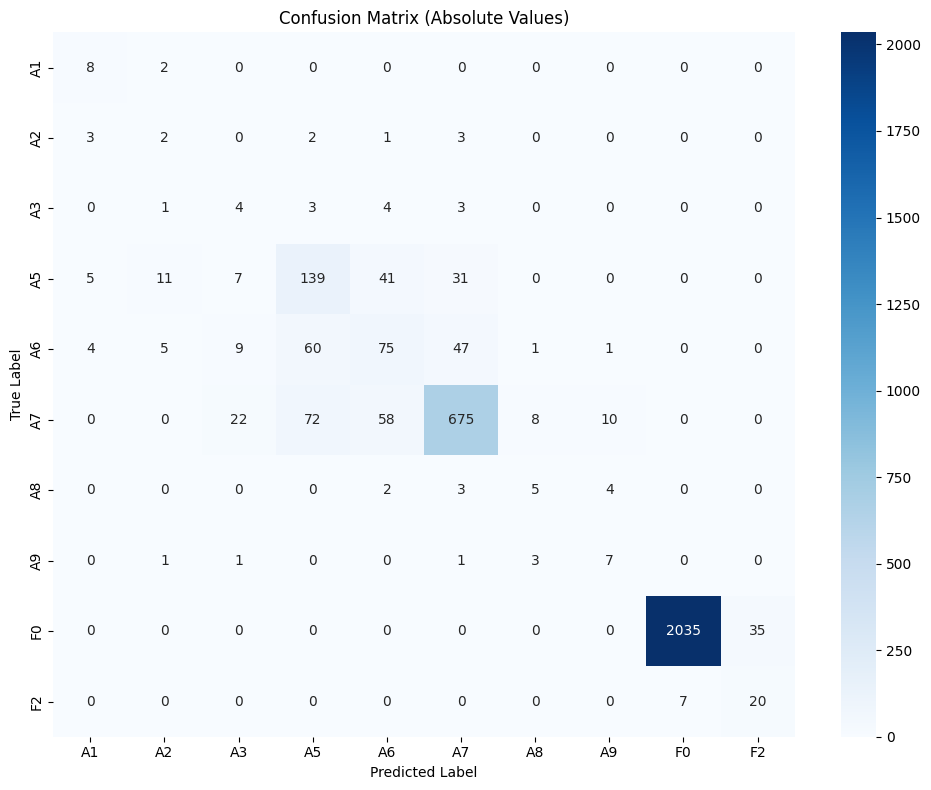

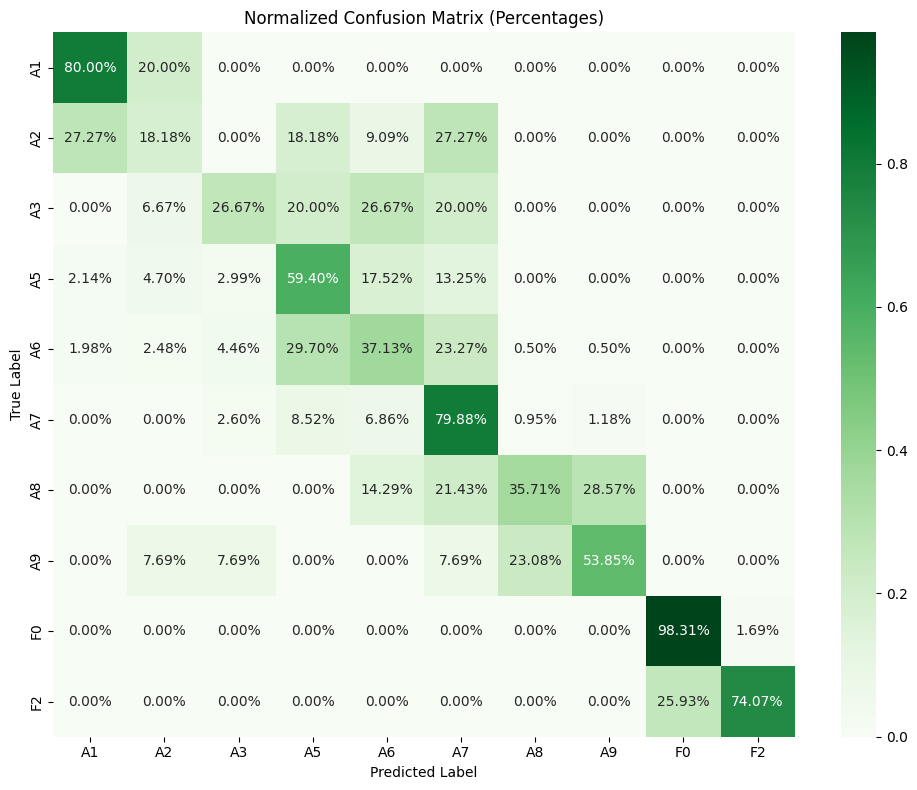

In [10]:
# Drop NaNs and convert subclass to string type
df_filtered['type'] = df_filtered['subclass'].astype(str)                     # Create 'type' column

# Filter groups by type
group_A_types = ['A1', 'A2', 'A3', 'A5', 'A6', 'A7', 'A8', 'A9']              # Group A types
group_F_types = ['F0', 'F2']                                                  # Group F types
df_A = df_filtered[df_filtered['type'].isin(group_A_types)].copy()           # Filter Group A
df_F = df_filtered[df_filtered['type'].isin(group_F_types)].copy()           # Filter Group F

# Define training function with SMOTE
def train_subset_model_with_smote(df_subset):                                
    X = df_subset[FEATURE_COLUMNS]                                           # Features
    y = df_subset['type']                                                   # Target
    
    le = LabelEncoder()                                                      # Label encoder
    y_encoded = le.fit_transform(y)                                          # Encode target

    X_train, X_val, y_train, y_val = train_test_split(                       # Stratified split
        X, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42    
    )

    smote = SMOTE(sampling_strategy='not majority', random_state=42)        # Apply SMOTE
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)         

    model = RandomForestClassifier(                                          # Random forest config
        n_estimators=500,
        max_depth=15,
        bootstrap=True,
        random_state=42
    )
    model.fit(X_train_res, y_train_res)                                      # Train model
    y_pred = model.predict(X_val)                                            # Predict validation

    return y_val, y_pred, le                                                 # Return results

# Train both groups separately
y_val_A, y_pred_A, le_A = train_subset_model_with_smote(df_A)               # Group A results
y_val_F, y_pred_F, le_F = train_subset_model_with_smote(df_F)               # Group F results

# Combine results for final evaluation
y_val_combined = list(le_A.inverse_transform(y_val_A)) + list(le_F.inverse_transform(y_val_F))
y_pred_combined = list(le_A.inverse_transform(y_pred_A)) + list(le_F.inverse_transform(y_pred_F))
all_classes = sorted(set(y_val_combined + y_pred_combined))                 # All unique classes

# Accuracy evaluation
print(f"\nCombined Accuracy: {accuracy_score(y_val_combined, y_pred_combined):.4f}")  # Accuracy

# Absolute confusion matrix
cm = confusion_matrix(y_val_combined, y_pred_combined, labels=all_classes)            # Matrix
print("\nConfusion Matrix:")
print(pd.DataFrame(cm, index=all_classes, columns=all_classes))                       # Print matrix

plt.figure(figsize=(10, 8))                                                            # Plot size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',                                     # Heatmap
            xticklabels=all_classes,
            yticklabels=all_classes)
plt.title('Confusion Matrix (Absolute Values)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Normalized confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]                          # Normalize
plt.figure(figsize=(10, 8))
sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Greens',                            # Heatmap
            xticklabels=all_classes,
            yticklabels=all_classes)
plt.title('Normalized Confusion Matrix (Percentages)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


In [11]:
%%time

# Initialize models with optimized parameters
models = {
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=5000, multi_class='multinomial', solver='lbfgs'),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42, max_depth=15),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=10, weights='distance'),
    'SVC': SVC(random_state=42, kernel='rbf', gamma='scale', C=200.0, class_weight='balanced'),
    'GaussianNB': GaussianNB(var_smoothing=1e-9)
}

best_accuracy = 0
best_model = None
best_model_name = ""
best_cm = None
best_le = None

# Define training function with SMOTE and StandardScaler
def train_subset_model_with_smote(df_subset, model, model_name):
    X = df_subset[FEATURE_COLUMNS]
    y = df_subset['type']
    
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    X_train, X_val, y_train, y_val = train_test_split(
        X, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42
    )

    # Apply SMOTE
    smote = SMOTE(sampling_strategy='not majority', random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    
    # Scale data for models that need it
    if model_name in ['LogisticRegression', 'SVC', 'KNeighborsClassifier']:
        scaler = StandardScaler()
        X_train_res = scaler.fit_transform(X_train_res)
        X_val = scaler.transform(X_val)

    model.fit(X_train_res, y_train_res)
    
    # Get both training and validation predictions
    y_train_pred = model.predict(X_train_res)
    y_val_pred = model.predict(X_val)
    
    # Calculate both accuracies
    train_acc = accuracy_score(y_train_res, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    
    return y_val, y_val_pred, le, train_acc, val_acc

# Train and evaluate each model
for model_name, model in models.items():
    try:
        # Train Group A
        y_val_A, y_pred_A, le_A, train_acc_A, val_acc_A = train_subset_model_with_smote(df_A, model, model_name)
        # Train Group F
        y_val_F, y_pred_F, le_F, train_acc_F, val_acc_F = train_subset_model_with_smote(df_F, model, model_name)
        
        # Combine results
        y_val_combined = list(le_A.inverse_transform(y_val_A)) + list(le_F.inverse_transform(y_val_F))
        y_pred_combined = list(le_A.inverse_transform(y_pred_A)) + list(le_F.inverse_transform(y_pred_F))
        
        # Calculate combined accuracy
        combined_val_acc = accuracy_score(y_val_combined, y_pred_combined)
        
        # Calculate combined training accuracy (approximate)
        combined_train_acc = (train_acc_A + train_acc_F)/2
        
        print(f'\n[******* {model_name} ******]')
        print(f'  Training Accuracy (Group A): {train_acc_A:.4f}')
        print(f'  Validation Accuracy (Group A): {val_acc_A:.4f}')
        print(f'  Training Accuracy (Group F): {train_acc_F:.4f}')
        print(f'  Validation Accuracy (Group F): {val_acc_F:.4f}')
        print(f'\n  Combined Validation Accuracy: {combined_val_acc:.4f}')
        print(f'  Approx. Combined Training Accuracy: {combined_train_acc:.4f}')
        
        print('\nClassification Report:')
        print(classification_report(y_val_combined, y_pred_combined, zero_division=0))
        
        # Track best model (based on validation accuracy)
        if combined_val_acc > best_accuracy:
            best_accuracy = combined_val_acc
            best_model = model
            best_model_name = model_name
            best_cm = confusion_matrix(y_val_combined, y_pred_combined, 
                                     labels=sorted(set(y_val_combined + y_pred_combined)))
            best_le = le_A

    except Exception as e:
        print(f"\n[!!! Failed to train {model_name} !!!]")
        print(f"Error: {str(e)}")
        continue

# Final summary
print("\nModel Performance Summary:")
for model_name, model in models.items():
    if hasattr(model, 'score'):
        print(f"{model_name}:")
        print(f"  Training Score: {model.score(X_train_res, y_train_res)*100:.2f}%")
        print(f"  Validation Score: {model.score(X_val, y_val)*100:.2f}%")
        
print(f"\nBest Model: {best_model_name} with validation accuracy {best_accuracy:.4f}")

/home/dmitry/Projects/star_classification/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/dmitry/Projects/star_classification/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(



[******* LogisticRegression ******]
  Training Accuracy (Group A): 0.6451
  Validation Accuracy (Group A): 0.4955
  Training Accuracy (Group F): 0.9638
  Validation Accuracy (Group F): 0.9571

  Combined Validation Accuracy: 0.7768
  Approx. Combined Training Accuracy: 0.8045

Classification Report:
              precision    recall  f1-score   support

          A1       0.32      0.90      0.47        10
          A2       0.03      0.27      0.06        11
          A3       0.05      0.53      0.09        15
          A5       0.48      0.50      0.49       234
          A6       0.30      0.29      0.30       202
          A7       0.88      0.54      0.67       845
          A8       0.13      0.71      0.22        14
          A9       0.17      0.46      0.24        13
          F0       1.00      0.96      0.98      2070
          F2       0.22      0.89      0.35        27

    accuracy                           0.78      3441
   macro avg       0.36      0.61      0.39     

/home/dmitry/Projects/star_classification/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/dmitry/Projects/star_classification/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/dmitry/Projects/star_classification/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


  Training Score: 50.00%
  Validation Score: 39.06%
SVC:
  Training Score: 50.00%
  Validation Score: 39.06%
GaussianNB:
  Training Score: 53.47%
  Validation Score: 42.98%

Best Model: RandomForestClassifier with validation accuracy 0.8634
CPU times: user 20.1 s, sys: 92 ms, total: 20.2 s
Wall time: 14 s


/home/dmitry/Projects/star_classification/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/home/dmitry/Projects/star_classification/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/home/dmitry/Projects/star_classification/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


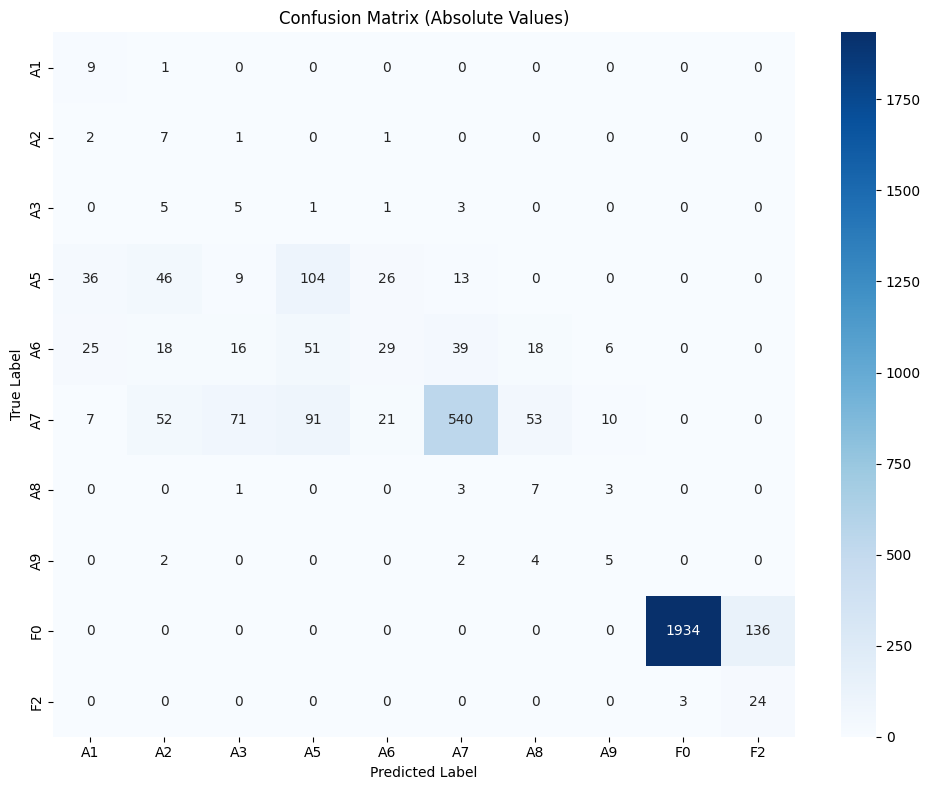

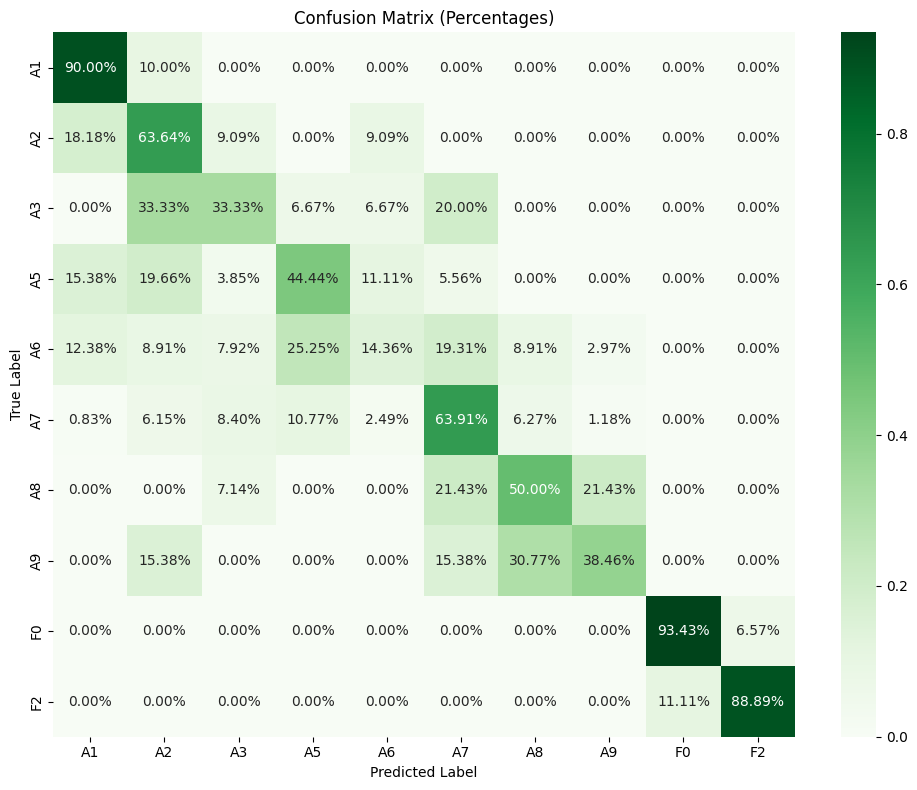


=== Remaining Classes After Filtering ===
subclass
F0    6897
A7    2814
A5     780
A6     672
F2      91
A3      49
A8      46
A9      45
A2      38
A1      34
Name: count, dtype: int64


In [12]:
# Create confusion matrix
labels = sorted(set(y_val_combined))                                          # Sorted unique labels
cm = confusion_matrix(y_val_combined, y_pred_combined, labels=labels)        # Absolute confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]           # Normalized matrix (percentages)

# Plot absolute confusion matrix
plt.figure(figsize=(10, 8))                                                  # Figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',                           # Absolute heatmap
            xticklabels=labels,
            yticklabels=labels)
plt.title('Confusion Matrix (Absolute Values)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Plot normalized confusion matrix
plt.figure(figsize=(10, 8))                                                  # Figure size
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Greens',            # Percentage heatmap
            xticklabels=labels,
            yticklabels=labels)
plt.title('Confusion Matrix (Percentages)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Display remaining classes
print("\n=== Remaining Classes After Filtering ===")
print(df_filtered['subclass'].value_counts())                                # Count remaining subclasses


# 3. Luminosity Class Classification

In [13]:
df_lum.columns

Index(['identifier', 'luminosity_class', 'recno', 'spt',
       'effective_temperature_1', 'metallicity_fe_h_1', 'visual_magnitude',
       'effective_temperature_2', 'log_surface_gravity_2', 'radius', 'mass',
       'luminosity', 'distance', 'lamost', 'date',
       'corrected_effective_temperature_1', 'corrected_log_surface_gravity_1',
       'corrected_metallicity_fe_h_2'],
      dtype='object')

In [14]:
# Configuration
TARGET_COLUMN_lum    = 'luminosity_class'                                    # Target column name
FEATURE_COLUMNS_lum  = ['luminosity', 'visual_magnitude',                   # Selected features
                        'mass', 'log_surface_gravity_2', 'corrected_log_surface_gravity_1',
                        'metallicity_fe_h_1', 'corrected_metallicity_fe_h_2',
                        'effective_temperature_2', 'corrected_effective_temperature_1',
                        'distance']

# Prepare feature data
X_lum = df_lum[FEATURE_COLUMNS_lum]                                         # Feature matrix

# Prepare target data
y_lum = df_lum[TARGET_COLUMN_lum]                                           # Target labels

# Split data (stratified)
X_train_lum, X_val_lum, y_train_lum, y_val_lum = train_test_split(         # Stratified split
    X_lum, y_lum, test_size=0.3, stratify=y_lum, random_state=42
)

# Handle class imbalance with SMOTE
smote_lum = SMOTE(sampling_strategy='not majority', random_state=42)       # SMOTE setup
X_train_res_lum, y_train_res_lum = smote_lum.fit_resample(X_train_lum, y_train_lum)  # Oversample training set

# Train model
model_lum = RandomForestClassifier(                                        # RandomForest setup
    n_estimators=100,
    max_depth=7,
    class_weight='balanced_subsample',
    random_state=42
)
model_lum.fit(X_train_res_lum, y_train_res_lum)                            # Fit model on resampled data

# Evaluation
y_pred_lum = model_lum.predict(X_val_lum)                                  # Predict validation data

# Create confusion matrix
classes_lum = np.unique(y_lum)                                             # Sorted class labels
cm_lum = confusion_matrix(y_val_lum, y_pred_lum, labels=classes_lum)       # Confusion matrix

# Print results
print(f"Validation Accuracy: {accuracy_score(y_val_lum, y_pred_lum):.4f}") # Print accuracy
print("\nConfusion Matrix (True vs Predicted):")
print(pd.DataFrame(                                                        # Format confusion matrix
    cm_lum,
    index=classes_lum,
    columns=classes_lum
))


Validation Accuracy: 0.7908

Confusion Matrix (True vs Predicted):
    II   IV    V
II  21    2    1
IV  28  166   76
V   22  147  856


In [15]:
# Configuration
TARGET_COLUMN_lum = 'luminosity_class'
FEATURE_COLUMNS_lum = [
    'luminosity', 'visual_magnitude', 'mass', 
    'log_surface_gravity_2', 'corrected_log_surface_gravity_1',
    'metallicity_fe_h_1', 'corrected_metallicity_fe_h_2',
    'effective_temperature_2', 'corrected_effective_temperature_1',
    'distance'
]

# Prepare data
X_lum = df_lum[FEATURE_COLUMNS_lum]
y_lum = df_lum[TARGET_COLUMN_lum]

# Split data (stratified)
X_train_lum, X_val_lum, y_train_lum, y_val_lum = train_test_split(
    X_lum, y_lum, test_size=0.3, stratify=y_lum, random_state=42
)

# Handle class imbalance with SMOTE
smote_lum = SMOTE(sampling_strategy='not majority', random_state=42)
X_train_res_lum, y_train_res_lum = smote_lum.fit_resample(X_train_lum, y_train_lum)

# Initialize models with optimized parameters
models_lum = {
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=5000, multi_class='multinomial', solver='lbfgs'),
    'DecisionTree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'RandomForest': RandomForestClassifier(n_estimators=200, max_depth=15, class_weight='balanced_subsample', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5, weights='distance'),
    'SVC': SVC(random_state=42, kernel='rbf', gamma='scale', C=10, class_weight='balanced', probability=True),
    'GaussianNB': GaussianNB(var_smoothing=1e-9)
}

best_accuracy_lum = 0
best_model_lum = None
best_model_name_lum = ""
best_cm_lum = None
classes_lum = np.unique(y_lum)

# Train and evaluate each model
for model_name, model in models_lum.items():
    try:
        # Create fresh instance (alternative to clone)
        current_model = model.__class__(**model.get_params())
        
        # Scale data for sensitive models
        if model_name in ['LogisticRegression', 'SVC', 'KNN']:
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_res_lum)
            X_val_scaled = scaler.transform(X_val_lum)
            X_to_predict = X_val_scaled
        else:
            X_train_scaled = X_train_res_lum
            X_val_scaled = X_val_lum
            X_to_predict = X_val_lum
        
        # Train model
        current_model.fit(X_train_scaled, y_train_res_lum)
        
        # Get predictions
        y_train_pred = current_model.predict(X_train_scaled)
        y_val_pred = current_model.predict(X_to_predict)
        
        # Calculate accuracies
        train_acc = accuracy_score(y_train_res_lum, y_train_pred)
        val_acc = accuracy_score(y_val_lum, y_val_pred)
        
        # Print results
        print(f'\n[******* {model_name} ******]')
        print(f'Training Accuracy: {train_acc:.4f}')
        print(f'Validation Accuracy: {val_acc:.4f}')
        print('\nClassification Report:')
        print(classification_report(y_val_lum, y_val_pred, zero_division=0, target_names=classes_lum))
        
        # Track best model
        if val_acc > best_accuracy_lum:
            best_accuracy_lum = val_acc
            best_model_lum = current_model
            best_model_name_lum = model_name
            best_cm_lum = confusion_matrix(y_val_lum, y_val_pred, labels=classes_lum)
            
    except Exception as e:
        print(f"\n[!!! Failed to train {model_name} !!!]")
        print(f"Error: {str(e)}")
        continue

# Final summary
print("\n=== Model Performance Summary ===")
for model_name, model in models_lum.items():
    try:
        if model_name in ['LogisticRegression', 'SVC', 'KNN']:
            X_train_eval = scaler.transform(X_train_res_lum)
            X_val_eval = scaler.transform(X_val_lum)
        else:
            X_train_eval = X_train_res_lum
            X_val_eval = X_val_lum
            
        train_score = accuracy_score(y_train_res_lum, model.predict(X_train_eval))
        val_score = accuracy_score(y_val_lum, model.predict(X_val_eval))
        print(f"{model_name}:")
        print(f"  Training: {train_score:.4f}  Validation: {val_score:.4f}  Diff: {train_score-val_score:.4f}")
    except:
        print(f"{model_name}: Evaluation failed")
        continue

print(f"\nBest Model: {best_model_name_lum} with validation accuracy {best_accuracy_lum:.4f}")

# Set up variables for plotting
model_lum = best_model_lum
y_pred_lum = best_model_lum.predict(X_val_scaled if best_model_name_lum in ['LogisticRegression', 'SVC', 'KNN'] else X_val_lum)
cm_lum = best_cm_lum


[******* LogisticRegression ******]
Training Accuracy: 0.7105
Validation Accuracy: 0.5997

Classification Report:
              precision    recall  f1-score   support

          II       0.22      0.92      0.36        24
          IV       0.28      0.54      0.37       270
           V       0.88      0.61      0.72      1025

    accuracy                           0.60      1319
   macro avg       0.46      0.69      0.48      1319
weighted avg       0.75      0.60      0.64      1319



/home/dmitry/Projects/star_classification/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



[******* DecisionTree ******]
Training Accuracy: 0.9195
Validation Accuracy: 0.7589

Classification Report:
              precision    recall  f1-score   support

          II       0.33      0.67      0.44        24
          IV       0.46      0.64      0.53       270
           V       0.91      0.79      0.85      1025

    accuracy                           0.76      1319
   macro avg       0.57      0.70      0.61      1319
weighted avg       0.81      0.76      0.78      1319


[******* RandomForest ******]
Training Accuracy: 0.9940
Validation Accuracy: 0.8089

Classification Report:
              precision    recall  f1-score   support

          II       0.39      0.67      0.49        24
          IV       0.54      0.63      0.59       270
           V       0.91      0.86      0.88      1025

    accuracy                           0.81      1319
   macro avg       0.62      0.72      0.65      1319
weighted avg       0.83      0.81      0.82      1319


[******* KNN ******

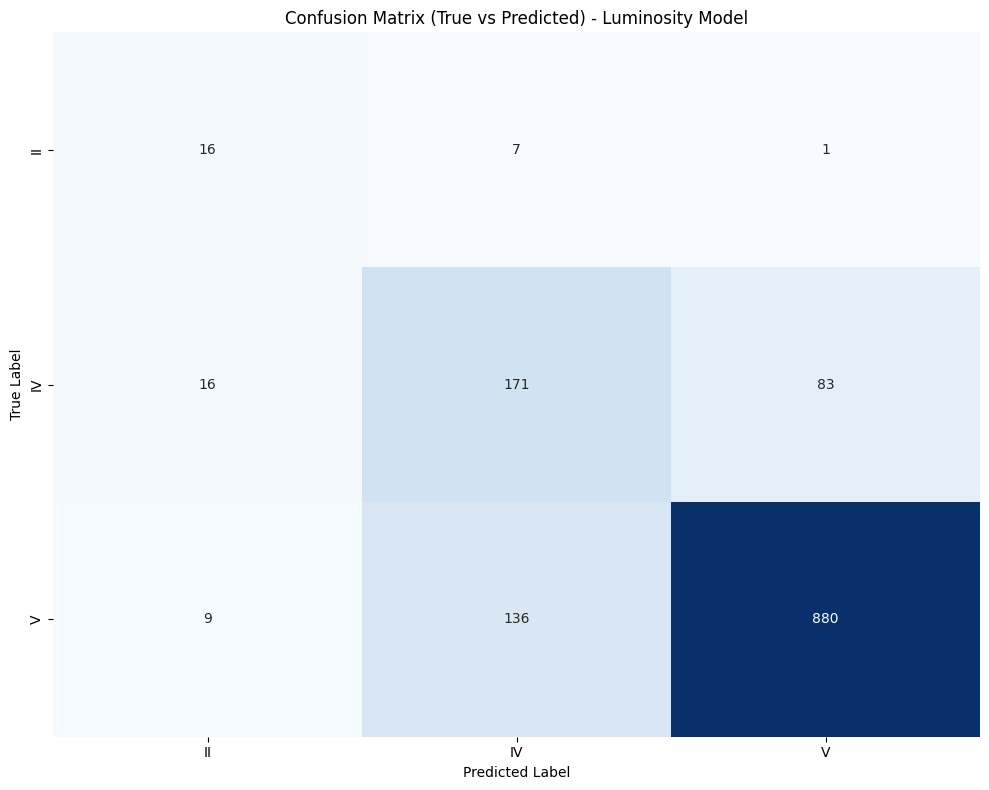

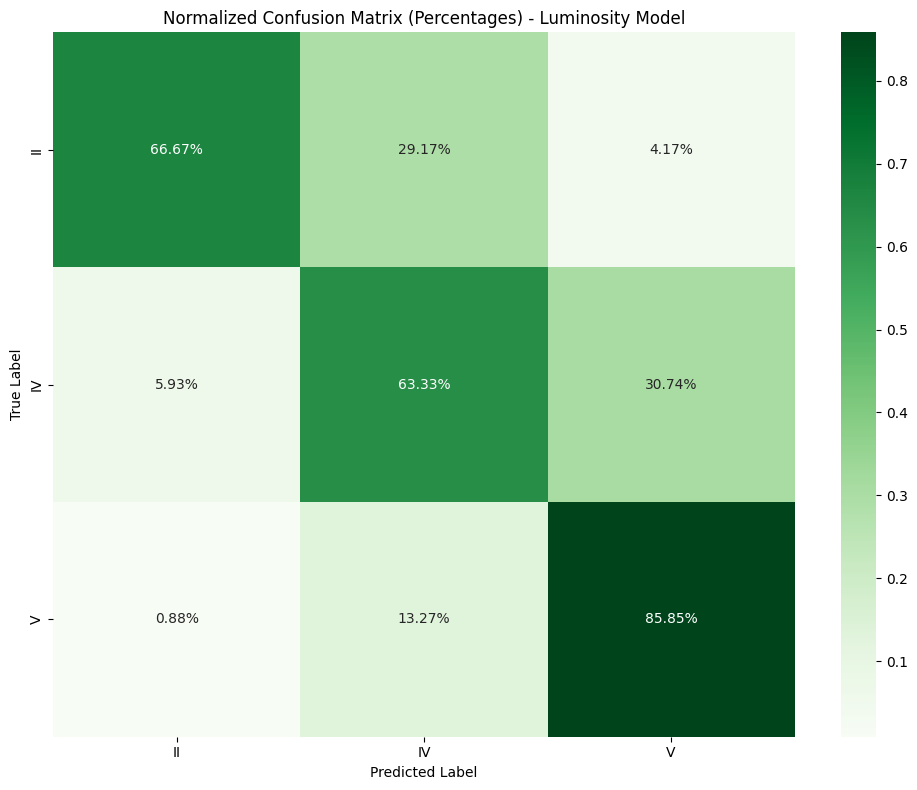

In [16]:
# Plot confusion matrix (absolute values) - Luminosity Model
plt.figure(figsize=(10, 8))                                                # Set figure size
sns.heatmap(                                                                # Draw heatmap
    cm_lum,
    annot=True,                                                             # Annotate cells
    fmt="d",                                                                # Integer format
    cmap="Blues",                                                           # Blue color scheme
    xticklabels=classes_lum,                                                # Predicted labels
    yticklabels=classes_lum,                                                # True labels
    cbar=False                                                              # No color bar
)
plt.title("Confusion Matrix (True vs Predicted) - Luminosity Model")        # Title
plt.xlabel("Predicted Label")                                               # X-axis label
plt.ylabel("True Label")                                                    # Y-axis label
plt.tight_layout()                                                          # Fit layout
plt.show()                                                                  # Display plot

# Normalized confusion matrix - Luminosity Model
cm_normalized_lum = cm_lum.astype('float') / cm_lum.sum(axis=1)[:, np.newaxis]  # Normalize by row

plt.figure(figsize=(10, 8))                                                # Set figure size
sns.heatmap(                                                                # Draw heatmap
    cm_normalized_lum,
    annot=True,                                                             # Annotate cells
    fmt=".2%",                                                              # Percentage format
    cmap="Greens",                                                          # Green color scheme
    xticklabels=classes_lum,                                                # Predicted labels
    yticklabels=classes_lum                                                 # True labels
)
plt.title("Normalized Confusion Matrix (Percentages) - Luminosity Model")   # Title
plt.xlabel("Predicted Label")                                               # X-axis label
plt.ylabel("True Label")                                                    # Y-axis label
plt.tight_layout()                                                          # Fit layout
plt.show()                                                                  # Display plot


# 4. Full Class Classification


=== Unified Model Accuracy (class + subclass) ===
Accuracy: 0.6672


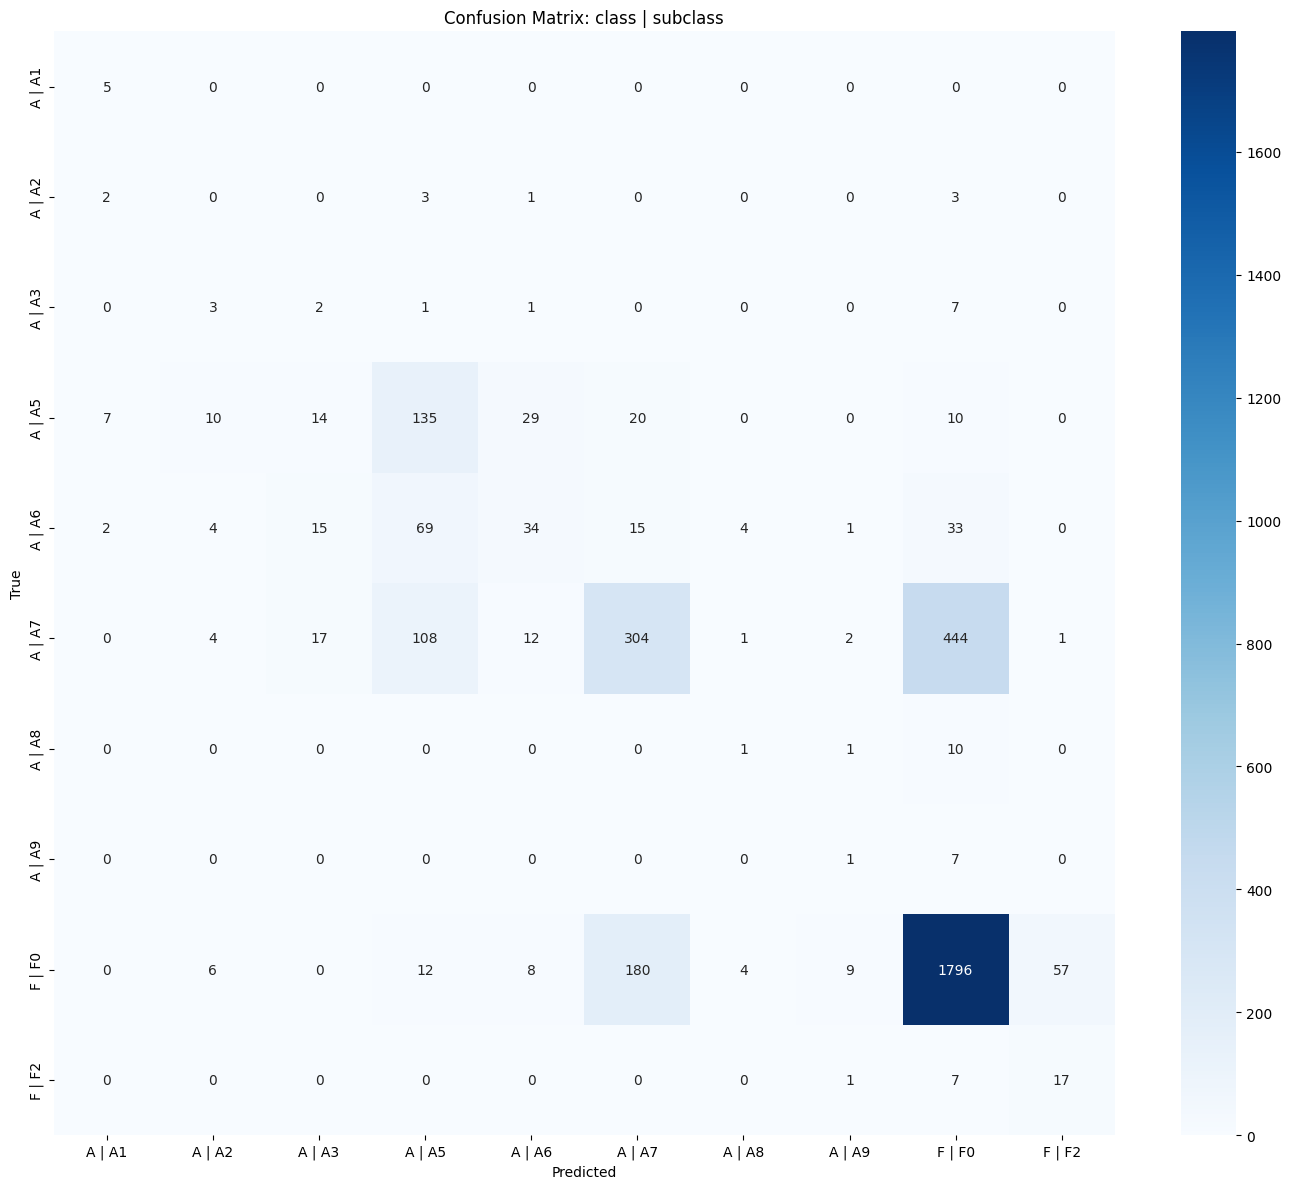

CPU times: user 20.4 s, sys: 31.1 ms, total: 20.4 s
Wall time: 20.4 s


In [17]:
%%time

# Feature and target setup
FEATURE_COLUMNS_T = [
    'mass', 'radius', 'distance', 'luminosity',
    'visual_magnitude',
    'corrected_effective_temperature_1',
    'corrected_log_surface_gravity_1',
    'corrected_metallicity_fe_h_2',
    'metallicity_fe_h_1',
    'log_surface_gravity_2',
]

X_T = df_T[FEATURE_COLUMNS_T]
y_class_T = df_T['class']
y_subclass_T = df_T['subclass']

# Encode labels
le_class_T = LabelEncoder()
le_subclass_T = LabelEncoder()
y_class_enc_T = le_class_T.fit_transform(y_class_T)
y_subclass_enc_T = le_subclass_T.fit_transform(y_subclass_T)

# Train/test split
X_train_T, X_val_T, y_class_train_T, y_class_val_T, y_subclass_train_T, y_subclass_val_T = train_test_split(
    X_T, y_class_enc_T, y_subclass_enc_T,
    test_size=0.3, stratify=y_class_enc_T, random_state=42
)

# === Train 'class' model ===
if len(np.unique(y_class_train_T)) > 1:
    smote_T = SMOTE(sampling_strategy='not majority', random_state=42)
    X_train_class_T, y_train_class_T = smote_T.fit_resample(X_train_T, y_class_train_T)
else:
    X_train_class_T, y_train_class_T = X_train_T, y_class_train_T

clf_class_T = RandomForestClassifier(n_estimators=100, max_depth=1, class_weight='balanced_subsample', random_state=42)
clf_class_T.fit(X_train_class_T, y_train_class_T)

# === Train 'subclass' models per class ===
subclass_models_T = {}
subclass_singletons_T = {}

for class_id_T in np.unique(y_class_train_T):
    idx_T = y_class_train_T == class_id_T
    X_sub_T = X_train_T[idx_T]
    y_sub_T = y_subclass_train_T[idx_T]
    unique_subs_T = np.unique(y_sub_T)

    if len(unique_subs_T) == 1:
        subclass_singletons_T[class_id_T] = unique_subs_T[0]
    else:
        X_sub_res_T, y_sub_res_T = SMOTE(random_state=42).fit_resample(X_sub_T, y_sub_T)
        clf_sub_T = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
        clf_sub_T.fit(X_sub_res_T, y_sub_res_T)
        subclass_models_T[class_id_T] = clf_sub_T

# === Predict ===
y_pred_class_T = clf_class_T.predict(X_val_T)
y_pred_subclass_T = []

for i in range(len(X_val_T)):
    x_instance_T = X_val_T.iloc[[i]]  # keep DataFrame with column names
    pred_class_T = y_pred_class_T[i]

    if pred_class_T in subclass_singletons_T:
        pred_subclass_T = subclass_singletons_T[pred_class_T]
    elif pred_class_T in subclass_models_T:
        pred_subclass_T = subclass_models_T[pred_class_T].predict(x_instance_T)[0]
    else:
        pred_subclass_T = -1  # unknown subclass
    y_pred_subclass_T.append(pred_subclass_T)

y_pred_subclass_T = np.array(y_pred_subclass_T)

# Filter valid predictions
valid_mask_T = y_pred_subclass_T != -1
y_true_combined_T = list(zip(y_class_val_T[valid_mask_T], y_subclass_val_T[valid_mask_T]))
y_pred_combined_T = list(zip(y_pred_class_T[valid_mask_T], y_pred_subclass_T[valid_mask_T]))

# Manual accuracy
accuracy_combined_T = np.mean([
    y_t_T == y_p_T for y_t_T, y_p_T in zip(y_true_combined_T, y_pred_combined_T)
])

print("\n=== Unified Model Accuracy (class + subclass) ===")
print(f"Accuracy: {accuracy_combined_T:.4f}")

# Create string labels for confusion matrix
def label_tuple_T(class_id_T, subclass_id_T):
    return f"{le_class_T.inverse_transform([class_id_T])[0]} | {le_subclass_T.inverse_transform([subclass_id_T])[0]}"

labels_true_T = [label_tuple_T(c_T, s_T) for c_T, s_T in y_true_combined_T]
labels_pred_T = [label_tuple_T(c_T, s_T) for c_T, s_T in y_pred_combined_T]
all_labels_T = sorted(set(labels_true_T) | set(labels_pred_T))

cm_T = confusion_matrix(labels_true_T, labels_pred_T, labels=all_labels_T)
cm_df_T = pd.DataFrame(cm_T, index=all_labels_T, columns=all_labels_T)

# Plot confusion matrix
plt.figure(figsize=(14, 12))
sns.heatmap(cm_df_T, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: class | subclass")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


In [18]:
# %%time

# # Feature and target setup (same as before)
# FEATURE_COLUMNS_T = [
#     'mass', 'radius', 'distance', 'luminosity',
#     'visual_magnitude',
#     'corrected_effective_temperature_1',
#     'corrected_log_surface_gravity_1',
#     'corrected_metallicity_fe_h_2',
#     'metallicity_fe_h_1',
#     'log_surface_gravity_2',
# ]

# X_T = df_T[FEATURE_COLUMNS_T]
# y_class_T = df_T['class']
# y_subclass_T = df_T['subclass']

# # Encode labels
# le_class_T = LabelEncoder()
# le_subclass_T = LabelEncoder()
# y_class_enc_T = le_class_T.fit_transform(y_class_T)
# y_subclass_enc_T = le_subclass_T.fit_transform(y_subclass_T)

# # Train/test split
# X_train_T, X_val_T, y_class_train_T, y_class_val_T, y_subclass_train_T, y_subclass_val_T = train_test_split(
#     X_T, y_class_enc_T, y_subclass_enc_T,
#     test_size=0.3, stratify=y_class_enc_T, random_state=42
# )

# # Define models with INDEPENDENT parameters for class and subclass
# class_models = {
#     'LogisticRegression_class': LogisticRegression(max_iter=5000, class_weight='balanced', random_state=42, C=10),
#     'RandomForest_class': RandomForestClassifier(n_estimators=200, max_depth=10, class_weight='balanced_subsample', random_state=42),
#     'SVC_class': SVC(kernel='rbf', C=10, gamma='scale', class_weight='balanced', probability=True, random_state=42)
# }

# subclass_models = {
#     'LogisticRegression_subclass': LogisticRegression(max_iter=5000, class_weight='balanced', random_state=42, C=1),
#     'RandomForest_subclass': RandomForestClassifier(n_estimators=100, max_depth=8, class_weight='balanced_subsample', random_state=42),
#     'SVC_subclass': SVC(kernel='rbf', C=1, gamma='auto', class_weight='balanced', probability=True, random_state=42)
# }

# # Results storage
# results_matrix = pd.DataFrame(index=class_models.keys(), columns=subclass_models.keys())
# best_accuracy = 0
# best_combo = None
# best_cm = None
# best_labels = None
# best_reports = {}

# # Iterate through all combinations
# for class_model_name, class_model in class_models.items():
#     for subclass_model_name, subclass_model in subclass_models.items():
#         try:
#             print(f"\n=== Evaluating {class_model_name} + {subclass_model_name} ===")
            
#             # === CLASS MODEL TRAINING ===
#             if len(np.unique(y_class_train_T)) > 1:
#                 smote_T = SMOTE(sampling_strategy='not majority', random_state=42)
#                 X_train_class_T, y_train_class_T = smote_T.fit_resample(X_train_T, y_class_train_T)
#             else:
#                 X_train_class_T, y_train_class_T = X_train_T, y_class_train_T
            
#             # Scale if needed
#             if 'LogisticRegression' in class_model_name or 'SVC' in class_model_name:
#                 scaler_class = StandardScaler()
#                 X_train_class_scaled = scaler_class.fit_transform(X_train_class_T)
#                 X_val_class_scaled = scaler_class.transform(X_val_T)
#             else:
#                 X_train_class_scaled = X_train_class_T
#                 X_val_class_scaled = X_val_T
            
#             current_class_model = clone(class_model)
#             current_class_model.fit(X_train_class_scaled, y_train_class_T)
            
#             # Class model evaluation
#             y_class_train_pred = current_class_model.predict(X_train_class_scaled)
#             y_class_val_pred = current_class_model.predict(X_val_class_scaled)
            
#             class_train_acc = accuracy_score(y_train_class_T, y_class_train_pred)
#             class_val_acc = accuracy_score(y_class_val_T, y_class_val_pred)
            
#             print(f"\nClass Model Performance ({class_model_name}):")
#             print(f"Training Accuracy: {class_train_acc:.4f}")
#             print(f"Validation Accuracy: {class_val_acc:.4f}")
#             print("\nClassification Report (Class):")
#             class_report = classification_report(y_class_val_T, y_class_val_pred, 
#                                               target_names=le_class_T.classes_, 
#                                               zero_division=0)
#             print(class_report)
            
#             # === SUBCLASS MODELS TRAINING ===
#             subclass_predictors_T = {}
#             subclass_singletons_T = {}
#             subclass_train_accs = []
#             subclass_val_accs = []
            
#             for class_id_T in np.unique(y_class_train_T):
#                 idx_T = y_class_train_T == class_id_T
#                 X_sub_T = X_train_T[idx_T]
#                 y_sub_T = y_subclass_train_T[idx_T]
#                 unique_subs_T = np.unique(y_sub_T)
                
#                 if len(unique_subs_T) == 1:
#                     subclass_singletons_T[class_id_T] = unique_subs_T[0]
#                 else:
#                     X_sub_res_T, y_sub_res_T = SMOTE(random_state=42).fit_resample(X_sub_T, y_sub_T)
                    
#                     # Scale if needed
#                     if 'LogisticRegression' in subclass_model_name or 'SVC' in subclass_model_name:
#                         scaler_sub = StandardScaler()
#                         X_sub_res_scaled = scaler_sub.fit_transform(X_sub_res_T)
#                     else:
#                         X_sub_res_scaled = X_sub_res_T
                    
#                     current_sub_model = clone(subclass_model)
#                     current_sub_model.fit(X_sub_res_scaled, y_sub_res_T)
#                     subclass_predictors_T[class_id_T] = (current_sub_model, 'scaler_sub' in locals())
                    
#                     # Subclass model evaluation
#                     y_sub_train_pred = current_sub_model.predict(X_sub_res_scaled)
#                     y_sub_val_pred = current_sub_model.predict(
#                         scaler_sub.transform(X_val_T[y_class_val_T == class_id_T]) if 'scaler_sub' in locals() 
#                         else X_val_T[y_class_val_T == class_id_T]
#                     )
                    
#                     subclass_train_accs.append(accuracy_score(y_sub_res_T, y_sub_train_pred))
#                     subclass_val_accs.append(accuracy_score(
#                         y_subclass_val_T[y_class_val_T == class_id_T], 
#                         y_sub_val_pred
#                     ))
            
#             # === COMBINED PREDICTION ===
#             y_pred_class_T = current_class_model.predict(X_val_class_scaled)
#             y_pred_subclass_T = np.full(len(X_val_T), -1)
            
#             for i in range(len(X_val_T)):
#                 pred_class_T = y_pred_class_T[i]
#                 true_class_T = y_class_val_T[i]
                
#                 if pred_class_T in subclass_singletons_T:
#                     y_pred_subclass_T[i] = subclass_singletons_T[pred_class_T]
#                 elif pred_class_T in subclass_predictors_T:
#                     sub_model, needs_scaling = subclass_predictors_T[pred_class_T]
#                     x_instance = X_val_T.iloc[[i]]
#                     if needs_scaling:
#                         x_instance = scaler_sub.transform(x_instance)
#                     y_pred_subclass_T[i] = sub_model.predict(x_instance)[0]
            
#             # Filter valid predictions
#             valid_mask = y_pred_subclass_T != -1
#             y_true_combined = list(zip(y_class_val_T[valid_mask], y_subclass_val_T[valid_mask]))
#             y_pred_combined = list(zip(y_pred_class_T[valid_mask], y_pred_subclass_T[valid_mask]))
            
#             # Calculate combined accuracy
#             accuracy_combined = np.mean([y_t == y_p for y_t, y_p in zip(y_true_combined, y_pred_combined)])
            
#             # Store results
#             results_matrix.loc[class_model_name, subclass_model_name] = accuracy_combined
            
#             # Print subclass performance
#             if subclass_train_accs:
#                 print(f"\nSubclass Model Performance ({subclass_model_name}):")
#                 print(f"Avg Training Accuracy: {np.mean(subclass_train_accs):.4f}")
#                 print(f"Avg Validation Accuracy: {np.mean(subclass_val_accs):.4f}")
            
#             # Generate combined labels for classification report
#             labels_true = [f"{le_class_T.inverse_transform([c])[0]}|{le_subclass_T.inverse_transform([s])[0]}" 
#                          for c, s in y_true_combined]
#             labels_pred = [f"{le_class_T.inverse_transform([c])[0]}|{le_subclass_T.inverse_transform([s])[0]}" 
#                          for c, s in y_pred_combined]
            
#             print(f"\nCombined Validation Accuracy: {accuracy_combined:.4f}")
#             print("\nCombined Classification Report:")
#             combined_report = classification_report(
#                 labels_true, labels_pred, 
#                 zero_division=0
#             )
#             print(combined_report)
            
#             # Track best model
#             if accuracy_combined > best_accuracy:
#                 best_accuracy = accuracy_combined
#                 best_combo = (class_model_name, subclass_model_name)
#                 best_cm = confusion_matrix(labels_true, labels_pred, 
#                                          labels=sorted(set(labels_true + labels_pred)))
#                 best_labels = sorted(set(labels_true + labels_pred))
#                 best_reports = {
#                     'class': class_report,
#                     'subclass': f"Avg Subclass Val Acc: {np.mean(subclass_val_accs):.4f}",
#                     'combined': combined_report
#                 }
                
#         except Exception as e:
#             print(f"\n[!!! Failed {class_model_name}+{subclass_model_name} !!!]")
#             print(f"Error: {str(e)}")
#             results_matrix.loc[class_model_name, subclass_model_name] = np.nan
#             continue

# # Final results
# print("\n=== Performance Matrix ===")
# print("Columns: Subclass models | Rows: Class models")
# print(results_matrix)

# print(f"\nBest Combo: {best_combo[0]} + {best_combo[1]}")
# print(f"Best Combined Accuracy: {best_accuracy:.4f}")

In [19]:
# # Print best reports
# print("\n=== Best Class Model Report ===")
# print(best_reports['class'])

# print("\n=== Best Subclass Performance ===")
# print(best_reports['subclass'])

# print("\n=== Best Combined Report ===")
# print(best_reports['combined'])

# # Plot confusion matrix
# plt.figure(figsize=(14, 12))
# sns.heatmap(pd.DataFrame(best_cm, index=best_labels, columns=best_labels), 
#             annot=True, fmt='d', cmap='Blues')
# plt.title(f"Confusion Matrix (Best Combo: {best_combo[0]} + {best_combo[1]})")
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.tight_layout()
# plt.show()

In [20]:
# === Apply trained models to df.dropna() ===
df_clean = df.dropna()

# Prepare feature sets
X_lum_full = df_clean[FEATURE_COLUMNS_lum]
X_T_full = df_clean[FEATURE_COLUMNS_T]

# Ground truth
y_lum_true = df_clean[TARGET_COLUMN].values
y_class_true = df_clean['class'].values
y_subclass_true = df_clean['subclass'].values

# Encode class and subclass
y_class_true_enc = le_class_T.transform(y_class_true)
y_subclass_true_enc = le_subclass_T.transform(y_subclass_true)

# Predict with luminosity model
y_lum_pred = model_lum.predict(X_lum_full)

# Predict with T model
y_class_pred_T = clf_class_T.predict(X_T_full)
y_subclass_pred_T = []

for i in range(len(X_T_full)):
    x_instance = X_T_full.iloc[[i]]
    pred_class = y_class_pred_T[i]
    
    if pred_class in subclass_singletons_T:
        pred_subclass = subclass_singletons_T[pred_class]
    elif pred_class in subclass_models_T:
        pred_subclass = subclass_models_T[pred_class].predict(x_instance)[0]
    else:
        pred_subclass = -1
    y_subclass_pred_T.append(pred_subclass)

y_subclass_pred_T = np.array(y_subclass_pred_T)

# Filter only fully valid predictions
valid_mask = y_subclass_pred_T != -1
y_combined_true = list(zip(y_class_true_enc[valid_mask],
                           y_subclass_true_enc[valid_mask],
                           y_lum_true[valid_mask]))
y_combined_pred = list(zip(y_class_pred_T[valid_mask],
                           y_subclass_pred_T[valid_mask],
                           y_lum_pred[valid_mask]))

# Accuracy of combined model (exact match in all three components)
accuracy_combined = np.mean([
    yt == yp for yt, yp in zip(y_combined_true, y_combined_pred)
])

# Confusion matrix: convert combined tuples to string labels
def label_triple(class_id, subclass_id, lum_label):
    return f"{le_class_T.inverse_transform([class_id])[0]} | {le_subclass_T.inverse_transform([subclass_id])[0]} | {lum_label}"

labels_true = [label_triple(c, s, l) for c, s, l in y_combined_true]
labels_pred = [label_triple(c, s, l) for c, s, l in y_combined_pred]
all_labels = sorted(set(labels_true) | set(labels_pred))

cm_combined = confusion_matrix(labels_true, labels_pred, labels=all_labels)
cm_combined_df = pd.DataFrame(cm_combined, index=all_labels, columns=all_labels)

# Print results
print("\n=== Combined Model Accuracy (class + subclass + luminosity_class) ===")
print(f"Accuracy: {accuracy_combined:.4f}")
print("\nConfusion Matrix (True vs Predicted):")
print(cm_combined_df)



=== Combined Model Accuracy (class + subclass + luminosity_class) ===
Accuracy: 0.0000

Confusion Matrix (True vs Predicted):
                A | A1 | IV  A | A1 | V  A | A1 | ['A']  A | A2 | IV  \
A | A1 | IV               0           0               0            0   
A | A1 | V                0           0               0            0   
A | A1 | ['A']           14           1               0            0   
A | A2 | IV               0           0               0            0   
A | A2 | V                0           0               0            0   
A | A2 | ['A']            0           1               0            5   
A | A3 | IV               0           0               0            0   
A | A3 | V                0           0               0            0   
A | A3 | ['A']            0           0               0            4   
A | A5 | IV               0           0               0            0   
A | A5 | V                0           0               0            0   
A | A5 | 

In [21]:
# === Corrected Full Class Prediction: subclass (e.g., "A7") + lum (e.g., "V") ===
df_clean = df.dropna()

# Prepare inputs
X_T_full   = df_clean[FEATURE_COLUMNS_T]
X_lum_full = df_clean[FEATURE_COLUMNS_lum]

# Ground truth
full_class_true = df_clean['full_class'].values

# Predict with temperature model (T)
y_class_pred_T = clf_class_T.predict(X_T_full)
y_subclass_pred_T = []

for i in range(len(X_T_full)):
    x_instance = X_T_full.iloc[[i]]
    pred_class = y_class_pred_T[i]

    if pred_class in subclass_singletons_T:
        pred_subclass = subclass_singletons_T[pred_class]
    elif pred_class in subclass_models_T:
        pred_subclass = subclass_models_T[pred_class].predict(x_instance)[0]
    else:
        pred_subclass = -1
    y_subclass_pred_T.append(pred_subclass)

y_subclass_pred_T = np.array(y_subclass_pred_T)

# Decode subclass only (already contains spectral type like "A7", "F0")
pred_subclass_strs = []
for sc in y_subclass_pred_T:
    if sc == -1:
        pred_subclass_strs.append(None)
    else:
        pred_subclass_strs.append(le_subclass_T.inverse_transform([sc])[0])  # e.g., "A7", "F0"

# Predict with luminosity model
lum_pred_strs = model_lum.predict(X_lum_full)  # e.g., "V", "IV", etc.

# Combine predictions
full_class_pred = []
full_class_true_valid = []

for sub, lum, true_val in zip(pred_subclass_strs, lum_pred_strs, full_class_true):
    if sub is None:
        continue  # skip unknowns
    full_class_pred.append(f"{sub}{lum}")  # e.g., "A7V"
    full_class_true_valid.append(true_val)

# Accuracy
accuracy_full_class = np.mean(
    np.array(full_class_pred) == np.array(full_class_true_valid)
)

# Confusion matrix
labels_all = sorted(set(full_class_true_valid) | set(full_class_pred))
cm = confusion_matrix(full_class_true_valid, full_class_pred, labels=labels_all)
cm_df = pd.DataFrame(cm, index=labels_all, columns=labels_all)

# Output
print("\n=== Combined Full Class Prediction Accuracy (Corrected) ===")
print(f"Accuracy: {accuracy_full_class:.4f}")
print("\nConfusion Matrix (True vs Predicted):")
print(cm_df)



=== Combined Full Class Prediction Accuracy (Corrected) ===
Accuracy: 0.3809

Confusion Matrix (True vs Predicted):
      A1IV  A1V  A2IV  A2V  A3IV  A3V  A5IV  A5V  A6IV  A6V  ...  A7V  A8II  \
A1IV    14    1     0    0     0    0     0    0     0    0  ...    0     0   
A1V      0    0     0    0     0    0     0    0     0    0  ...    0     0   
A2IV     0    0     5    0     0    0     1    0     0    0  ...    0     0   
A2V      0    1     0    5     0    0     0    1     0    0  ...    0     0   
A3IV     0    0     4    0    10    2     1    0     1    0  ...    0     0   
A3V      0    0     0    0     0    0     0    1     0    0  ...    1     0   
A5IV     0    0     0    0     0    0     0    0     0    0  ...    0     0   
A5V      2    6     2   17     4   16    43  299    11   39  ...   42     0   
A6IV     4    0     8    0    18    1   104   12   134    7  ...    6     0   
A6V      0    0     0    1     0    0     0    0     0    4  ...    0     0   
A7II     0    

In [23]:
%%time

# === Training combined T and Luminosity models using df_clean ===
df_clean = df.dropna()  # Ensure no NaNs

# Feature and target setup
FEATURE_COLUMNS_T = [
    'mass', 'radius', 'distance', 'luminosity',
    'visual_magnitude',
    'corrected_effective_temperature_1',
    'corrected_log_surface_gravity_1',
    'corrected_metallicity_fe_h_2',
    'metallicity_fe_h_1',
    'log_surface_gravity_2',
]

FEATURE_COLUMNS_lum  = ['luminosity', 'visual_magnitude',                   # Selected features
                        'mass', 'log_surface_gravity_2', 'corrected_log_surface_gravity_1',
                        'metallicity_fe_h_1', 'corrected_metallicity_fe_h_2',
                        'effective_temperature_2', 'corrected_effective_temperature_1',
                        'distance']

X_T   = df_clean[FEATURE_COLUMNS_T]
X_lum = df_clean[FEATURE_COLUMNS_lum]
y_class_T    = df_clean['class']
y_subclass_T = df_clean['subclass']
y_lum        = df_clean['luminosity_class']
y_full       = df_clean['full_class']

# === Encode labels ===
le_class_T    = LabelEncoder()
le_subclass_T = LabelEncoder()
le_lum        = LabelEncoder()

y_class_enc_T    = le_class_T.fit_transform(y_class_T)
y_subclass_enc_T = le_subclass_T.fit_transform(y_subclass_T)
y_lum_enc        = le_lum.fit_transform(y_lum)

# === Train T model ===
if len(np.unique(y_class_enc_T)) > 1:
    smote_T = SMOTE(sampling_strategy='not majority', random_state=42)
    X_train_T, y_train_T = smote_T.fit_resample(X_T, y_class_enc_T)
else:
    X_train_T, y_train_T = X_T, y_class_enc_T

clf_class_T = RandomForestClassifier(n_estimators=100, max_depth=1, class_weight='balanced_subsample', random_state=42)
clf_class_T.fit(X_train_T, y_train_T)

subclass_models_T = {}
subclass_singletons_T = {}

for class_id in np.unique(y_train_T):
    idx = y_class_enc_T == class_id
    X_sub = X_T[idx]
    y_sub = y_subclass_enc_T[idx]
    unique_subs = np.unique(y_sub)

    if len(unique_subs) == 1:
        subclass_singletons_T[class_id] = unique_subs[0]
    else:
        X_sub_res, y_sub_res = SMOTE(random_state=42).fit_resample(X_sub, y_sub)
        clf_sub = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
        clf_sub.fit(X_sub_res, y_sub_res)
        subclass_models_T[class_id] = clf_sub

# === Train Luminosity model ===
model_lum = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model_lum.fit(X_lum, y_lum)

# === Predict final full_class ===
y_class_pred_T = clf_class_T.predict(X_T)
y_subclass_pred_T = []

for i in range(len(X_T)):
    x_instance = X_T.iloc[[i]]
    pred_class = y_class_pred_T[i]

    if pred_class in subclass_singletons_T:
        pred_subclass = subclass_singletons_T[pred_class]
    elif pred_class in subclass_models_T:
        pred_subclass = subclass_models_T[pred_class].predict(x_instance)[0]
    else:
        pred_subclass = -1
    y_subclass_pred_T.append(pred_subclass)

y_subclass_pred_T = np.array(y_subclass_pred_T)

# Decode subclass (e.g., "A7", "F0")
pred_subclass_strs = []
for sc in y_subclass_pred_T:
    if sc == -1:
        pred_subclass_strs.append(None)
    else:
        pred_subclass_strs.append(le_subclass_T.inverse_transform([sc])[0])

# Predict luminosity
lum_pred_strs = model_lum.predict(X_lum)  # e.g., "V", "IV"

# Combine predictions
full_class_pred = []
full_class_true = []

for sub, lum, true_val in zip(pred_subclass_strs, lum_pred_strs, y_full):
    if sub is None:
        continue
    full_class_pred.append(f"{sub}{lum}")
    full_class_true.append(true_val)

# Accuracy
accuracy_combined = np.mean(np.array(full_class_pred) == np.array(full_class_true))

# Confusion matrix
labels_all = sorted(set(full_class_true) | set(full_class_pred))
cm = confusion_matrix(full_class_true, full_class_pred, labels=labels_all)
cm_df = pd.DataFrame(cm, index=labels_all, columns=labels_all)

# Output
print("\n=== Final Combined Full Class Accuracy ===")
print(f"Accuracy: {accuracy_combined:.4f}")
print("\nConfusion Matrix (True vs Predicted):")
print(cm_df)



=== Final Combined Full Class Accuracy ===
Accuracy: 0.6656

Confusion Matrix (True vs Predicted):
      A1IV  A1V  A2II  A2IV  A2V  A3IV  A3V  A5IV  A5V  A6IV  A6V  A7II  A7IV  \
A1IV    13    1     0     0    0     0    0     0    1     0    0     0     0   
A1V      0    0     0     0    0     0    0     0    0     0    0     0     0   
A2II     0    0     0     0    0     0    0     0    0     0    0     0     0   
A2IV     0    0     0     5    1     0    0     0    0     0    0     0     0   
A2V      0    0     0     1   11     0    0     0    0     0    0     0     0   
A3IV     0    0     0     0    0    11   15     0    1     1    0     0     0   
A3V      0    0     0     0    0     0    5     0    0     0    0     0     0   
A5IV     0    0     0     0    0     0    0     0    0     0    0     0     0   
A5V      4    3     0     0   30     2   20     9  345     9   32     0     0   
A6IV     4    0     0     3   14    10   14     2  107    96   97     0     2   
A6V      

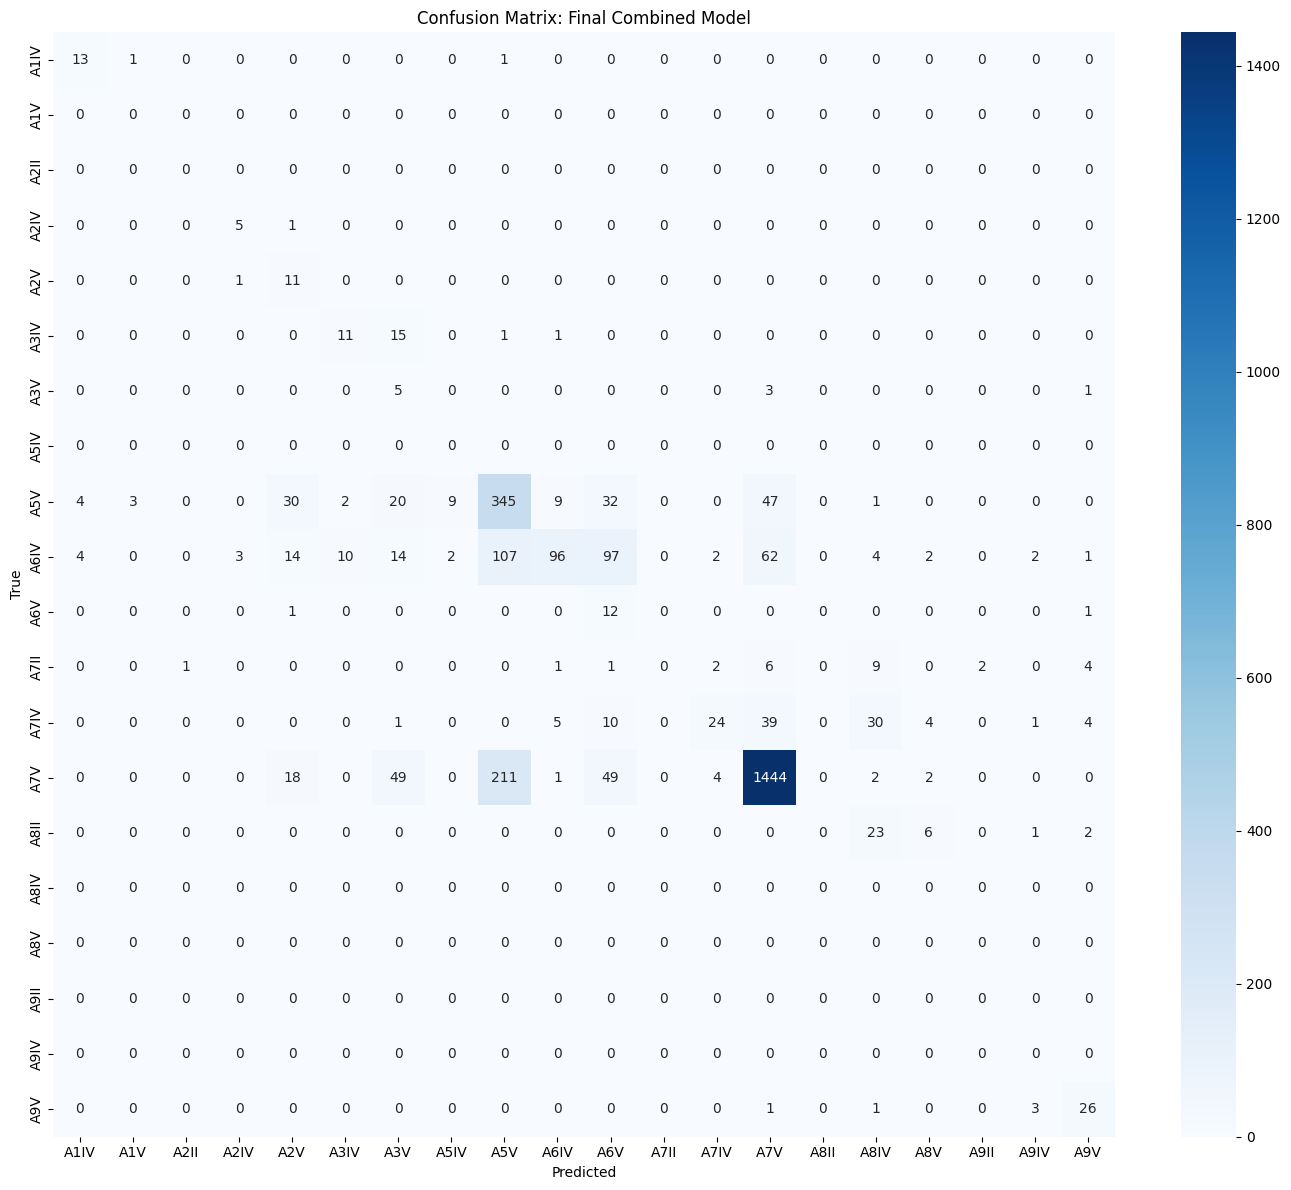

/tmp/ipykernel_52832/2674152911.py:13: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


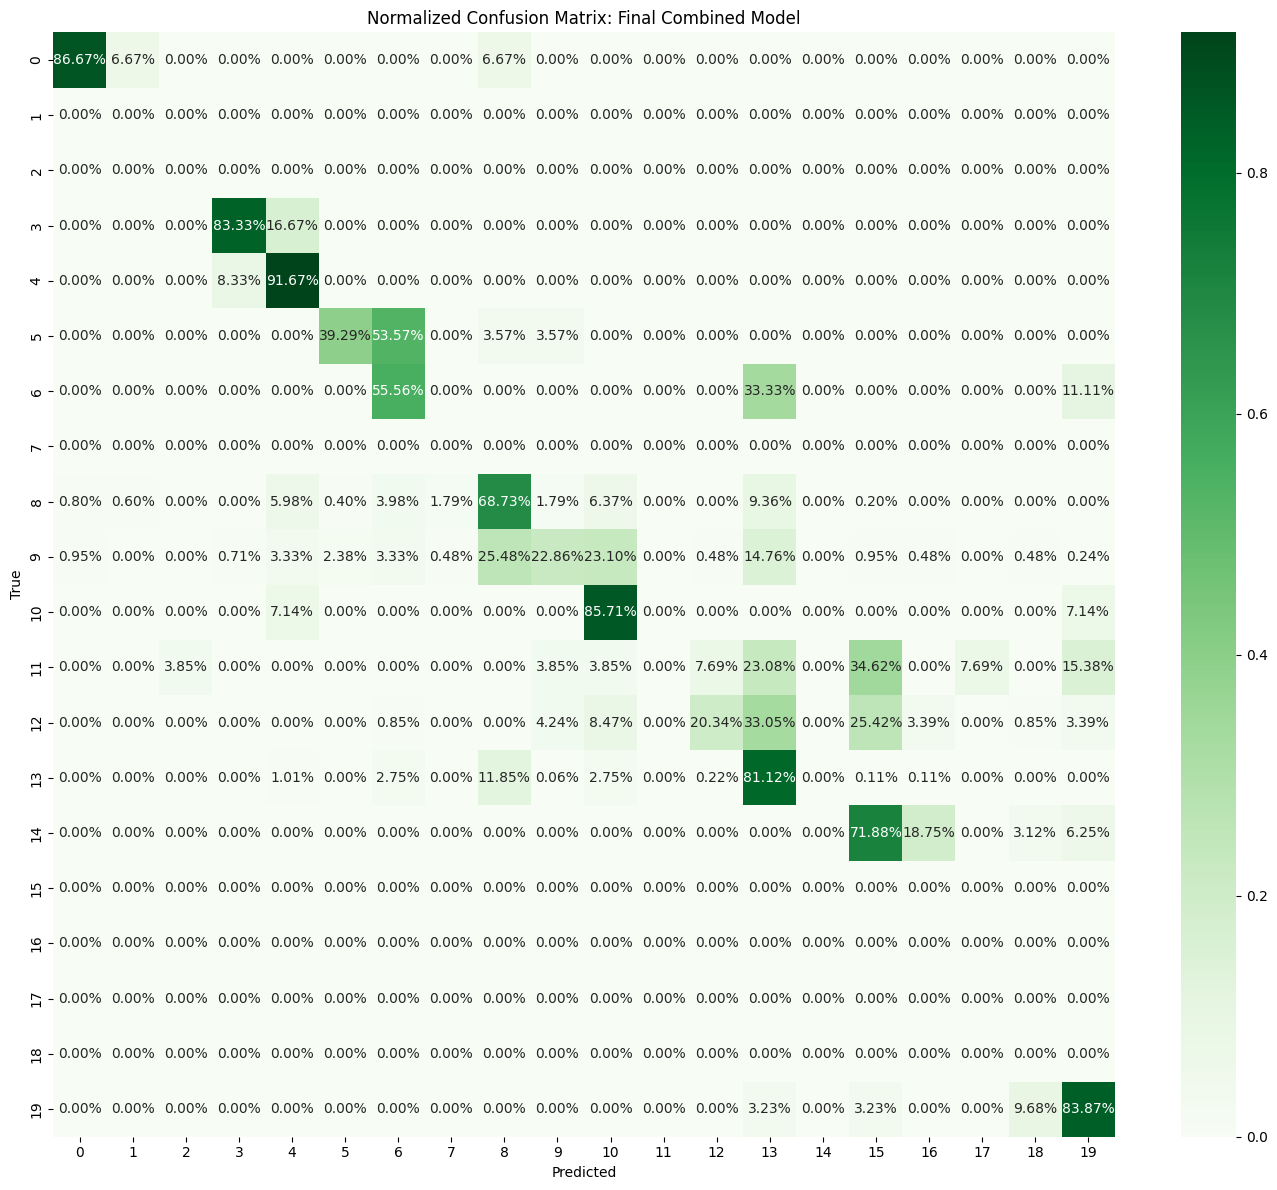

In [24]:
# Plot confusion matrix
plt.figure(figsize=(14, 12))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Final Combined Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

#######################################################################################################################################

# Normalize confusion matrix to percentages, handling division by 0
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_normalized = np.nan_to_num(cm_normalized, nan=0.0)  # Replace NaN with 0 for "0/0" cases

# Plot normalized confusion matrix
plt.figure(figsize=(14, 12))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Greens')
plt.title("Normalized Confusion Matrix: Final Combined Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()
